#Problème d'emploi du temps

In [ ]:
#importer les librairies nécessaires
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import time
import seaborn as sns
import pandas as pd

In [ ]:
class ProbEdt:
  def __init__(self, K,m,n):
    self.K=K #Créneaux 
    self.m=m #Professeurs
    self.n=n #Classes 

  def solutions_hasard(self,method=None):
      
      if method=='complexe' and self.n==20:
          aff = []
          for i in range(1,41):
              for j in range(5):
                  aff.append(i)
          aff = np.array(aff).reshape(10,20).T
          for j in range(10):
              aff[:,j] = np.random.permutation(aff[:,j])
          
          s = []
          for i in range(20):
              s.append([])
              for j in range(10):
                  s[i].extend([aff[i,j], aff[i,j]] )
              s[i] = np.random.permutation(s[i]) 
          return s 
      else:
        aff=[]
        for i in range(1,self.m+1):
          for j in range(3):
            aff.append(i)
        aff=np.array(aff).reshape(6, self.n).T
        for j in range(6):
          aff[:,j]=np.random.permutation(aff[:,j])
        s=[]
        for i in range(self.n):
          s.append([])
          for j in range(6):
            s[i].extend([aff[i,j],aff[i,j],aff[i,j]])
          s[i].extend([0,0])
        for i in range(self.n):
            s[i]=np.random.permutation(s[i])
        return s


  def voisin_solution_hasard(self,S):
      s_voisin=np.copy( S)
      i,j=random.randint(0,len(S[1])), random.randint(0,len(S[1]))
      k=np.random.randint(0,len(S))
      s_voisin[k][i],s_voisin[k][j]=s_voisin[k][j],s_voisin[k][i]
      return s_voisin

      


  
  def permutliste(self,s, er=False):#cette fonction est importante dans le calcul de la fonction  "tous_lesvoisinssansexc"
      """Retourne la liste de toutes les permutations de la liste seq (non récursif).
        si er=True: élimination des répétitions quand seq en a (ex: [1,2,2]
      """
      p = [s.tolist()]
      n = len(s)
      for k in range(0,n-1):
          for i in range(0, len(p)):
              z = p[i][:]
              for c in range(0,n-k-1):
                  z.append(z.pop(k))
                  if er==False or (z not in p):
                      p.append(z[:])
      return p
  def tous_lesvoisins(self,S):
      L=[]
      for k in range(len(S)):
        for i in range(len(S[1])):
          for j in range(i+1,len(S[1])):
              s_voisin=np.copy(S)
              s_voisin[k][i],s_voisin[k][j]=s_voisin[k][j],s_voisin[k][i]
              L.append(s_voisin)
      return L

  def tous_lesvoisinssansexc(self,S):#tous les voisins d'une solution donnée sans exception. Cependant nous n'allons pas l'utiliser car il prend énormément de temps puisqu'il y'aura un très grand nombre de voisins.
      L=[]
      for i in range(len(S)):
        J=self.permutliste(S[i],er=True)
        for p in range(len(J)):
          S[i]=J[p]
          L.append(S)
      
      return L


  def doublons(self,L):
      cpt=0
      dico={}
      for a in L:
        if a in dico:
          cpt+=1
        dico[a]=True
      return cpt

  def coût(self, S):
      coût=0
      for i in range(len(S)):
        coût+=self.doublons(np.array(S).reshape((len(S),len(S[0]))).T[i].tolist())
      return coût

  def argmin_J(self,s,p):
    L=self.tous_lesvoisins(s)
    List_cout=[]
    for i in range(len(L)):
      List_cout.append(self.coût(L[i]))
      ind=List_cout.index(min(List_cout))
    return L[ind]

        



In [ ]:
#Monte_carlo
def Mont_carlo(N,Pb,S):
  ref=np.copy(S)
  J1=float('inf')
  for i in range(1, N, 1):
    s=np.copy(ref)
    for i in range(Pb.n):
      s[i]=np.random.permutation(s[i])
    J=Pb.coût(s)
    if J<J1:
      J1=J
      s1=s
  return s1

In [ ]:
#Glouton
def Glouton(Pb,s):
  J1=np.float('inf')
  while Pb.coût(s)<J1:
    J1=Pb.coût(s)
    s=Pb.argmin_J(s,s)
  return s

In [ ]:
#GloutonAléatoire
def GloutonAleat(N,Pb,s,method=None):
  J1=np.float('inf')
  for i in range(1,N,1):
    if method=='complexe':
      s1=Pb.solutions_hasard(method='complexe')
    else:
      s1=Pb.solutions_hasard()
    if Pb.coût(s1)<Pb.coût(s):
      J1=Pb.coût(s1)
      s=s1
  return s

In [ ]:
#Tabou
def Tabou(s,K,Pb):
  J1=float('inf')
  Tabou=[]
  for i in range(1, len(s),1):
    if Pb.coût(s)<J1:
      J1=Pb.coût(s)
      s1=s
      Tabou.append(s)
    if len(Tabou)>K:
      Tabou.pop(0)
    s=Pb.argmin_J(s, Tabou)
  return s1

In [ ]:
np.math.factorial(20)*16

38926432130826240000

#Réponses aux questions




*   Ce problème accepte 16x20! solutions  soit 38926432130826240000 solutions.
*   Un voisin d'une solution S donnée peut être une permutation entre deux éléments distincts d'une liste s(i) quelconque de S.

*   Suivant cette définition,on a : une liste quelconque s(i) de S admet [(20!):[((3!)^6)x2!]] permutations possibles en éliminants les permutations identiques. Ainsi, sachant que nous avons 16 classes et que s(i) présente l'ordonancement pour une classe i donnée, nous aurons [(20!)/[((3!)^6)x2!]] * 16 voisins pour une solution S donnée. 





#Test

In [ ]:
List_temps=[]
List_coût=[]
List_Algo=['Solution_hasard','Monte_Carlo','Glouton','GloutonAlea','Tabou']

In [ ]:
K=20
m=32
n=16
ProbEd=ProbEdt(K,m,n)

In [ ]:
#Solution au hasard
start_time = time.time()
Solution_ahas=ProbEd.solutions_hasard()
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)

In [ ]:
ProbEd.coût(Solution_ahas)
List_coût.append(ProbEd.coût(Solution_ahas))

In [ ]:
#Monte_carlo
start_time = time.time()
Mont_carlo(10000,ProbEd,Solution_ahas)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)


In [ ]:
#Monte_carlo
ProbEd.coût(Mont_carlo(10000,ProbEd,Solution_ahas))
List_coût.append(ProbEd.coût(Mont_carlo(10000,ProbEd,Solution_ahas)))

In [ ]:
#Glouton
start_time = time.time()
Glouton(ProbEd,Solution_ahas)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)

In [ ]:
#Glouton
ProbEd.coût(Glouton(ProbEd,Solution_ahas))
List_coût.append(ProbEd.coût(Glouton(ProbEd,Solution_ahas)))

In [ ]:
#GloutonAléatoire
start_time = time.time()
GloutonAleat(1000,ProbEd,Solution_ahas)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)

In [ ]:
#GloutonAléatoire
ProbEd.coût(GloutonAleat(1000,ProbEd,Solution_ahas))
List_coût.append(ProbEd.coût(GloutonAleat(1000,ProbEd,Solution_ahas)))

In [ ]:
#Tabou
start_time = time.time()
Tabou(Solution_ahas,K,ProbEd)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)

In [ ]:
#Tabou
ProbEd.coût(Tabou(Solution_ahas,K,ProbEd))
List_coût.append(ProbEd.coût(Tabou(Solution_ahas,K,ProbEd)))

In [ ]:
df = pd.DataFrame(dict(List_Algo=List_Algo,List_temps=List_temps, List_coût=List_coût))

In [ ]:
df

,List_Algo,List_temps,List_coût
0,Solution_hasard,0.001092,48
1,Monte_Carlo,1.624835,27
2,Glouton,10.648737,0
3,GloutonAlea,0.635452,28
4,Tabou,5.378839,20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Coût de la solution')

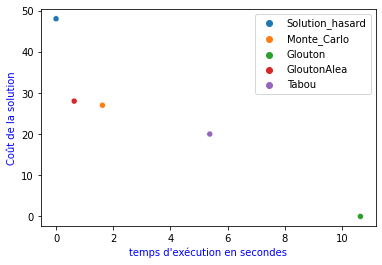

In [ ]:
sns.scatterplot(List_temps, List_coût, data=df,hue=List_Algo)
plt.xlabel("temps d'exécution en secondes",color='blue')
plt.ylabel('Coût de la solution', color='blue')

#Données plus compexes



*   5 classes par prof
*   2 séances par classe
*   10 séances par prof
*   10 profs par classe
*   20 classes







In [ ]:
List_temps=[]
List_coût=[]
List_Algo=['Solution_hasard','Monte_Carlo','Glouton','GloutonAlea','Tabou']

In [ ]:
K=20
m=32
n=20
ProbEd=ProbEdt(K,m,n)

In [ ]:
start_time = time.time()
Solution_ahas=ProbEd.solutions_hasard(method='complexe')
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)

In [ ]:
ProbEd.coût(Solution_ahas)
List_coût.append(ProbEd.coût(Solution_ahas))

In [ ]:
start_time = time.time()
Mont_carlo(10000,ProbEd,Solution_ahas)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)

In [ ]:
ProbEd.coût(Mont_carlo(10000,ProbEd,Solution_ahas))
List_coût.append(ProbEd.coût(Mont_carlo(10000,ProbEd,Solution_ahas)))

In [ ]:
start_time = time.time()
Glouton(ProbEd,Solution_ahas)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)

In [ ]:
ProbEd.coût(Glouton(ProbEd,Solution_ahas))
List_coût.append(ProbEd.coût(Glouton(ProbEd,Solution_ahas)))

In [ ]:
start_time = time.time()
GloutonAleat(1000,ProbEd,Solution_ahas,method='complexe')
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)

In [ ]:
ProbEd.coût(GloutonAleat(1000,ProbEd,Solution_ahas,method='complexe'))
List_coût.append(ProbEd.coût(GloutonAleat(1000,ProbEd,Solution_ahas,method='complexe')))

In [ ]:
start_time = time.time()
Tabou(Solution_ahas,K,ProbEd)
end_time = time.time()
total_time=end_time-start_time
List_temps.append(total_time)

In [ ]:
ProbEd.coût(Tabou(Solution_ahas,K,ProbEd))
List_coût.append(ProbEd.coût(Tabou(Solution_ahas,K,ProbEd)))

In [ ]:
df = pd.DataFrame(dict(List_Algo=List_Algo,List_temps=List_temps, List_coût=List_coût))

In [ ]:
df

,List_Algo,List_temps,List_coût
0,Solution_hasard,0.001207,86
1,Monte_Carlo,2.056559,49
2,Glouton,28.191417,0
3,GloutonAlea,0.955633,55
4,Tabou,11.027434,50


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Coût de la solution')

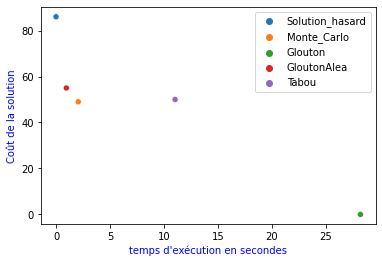

In [ ]:
sns.scatterplot(List_temps, List_coût, data=df,hue=List_Algo)
plt.xlabel("temps d'exécution en secondes",color='blue')
plt.ylabel('Coût de la solution', color='blue')